In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [8]:
df = pd.read_csv("crop_recommendation_outlierless.csv")
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
rf = RandomForestClassifier(random_state=42)
hyperparameters = {
    "n_estimators": [x for x in range(1, 20)],
    "max_depth": [x for x in range(1, 15)],
    "criterion": ["gini", "entropy", "log_loss"]
}

cv = GridSearchCV(estimator=rf, param_grid=hyperparameters, cv=5, scoring="accuracy", n_jobs=-1)
cv.fit(x_train, y_train)
print("Best hyperparameters: ", cv.best_params_)


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 11}


In [11]:
best_model = cv.best_estimator_
y_pred = best_model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
print("\n" + "="*50 + "\n")
print(f"Accuracy: {acc_score:.4f}")
print(f"Macro f1: {f1: .4f}")
print("\n" + "="*50 + "\n")



Accuracy: 0.9946
Macro f1:  0.9946




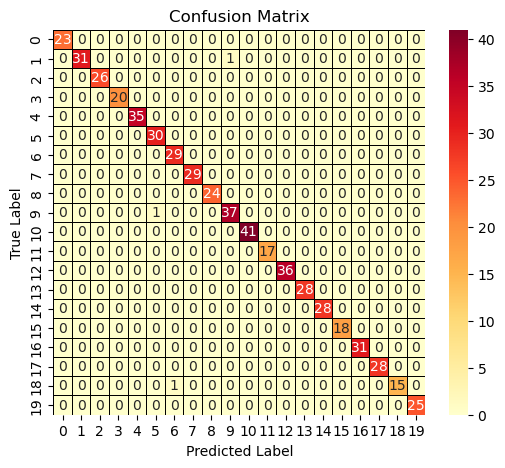

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

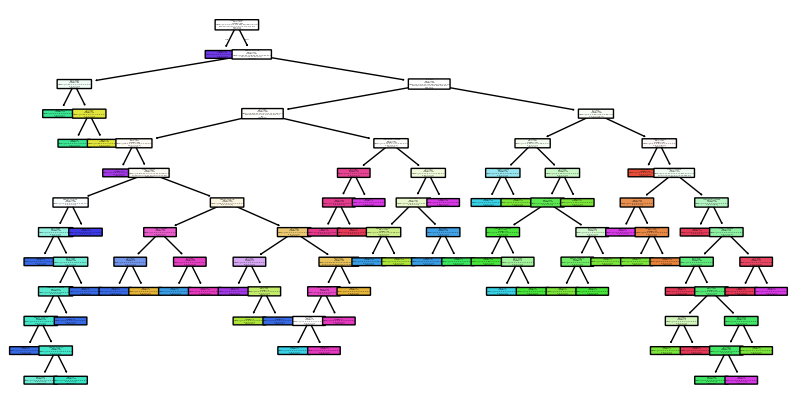

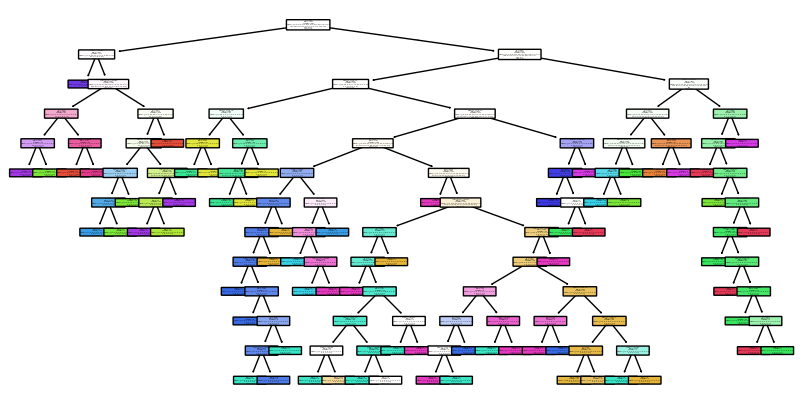

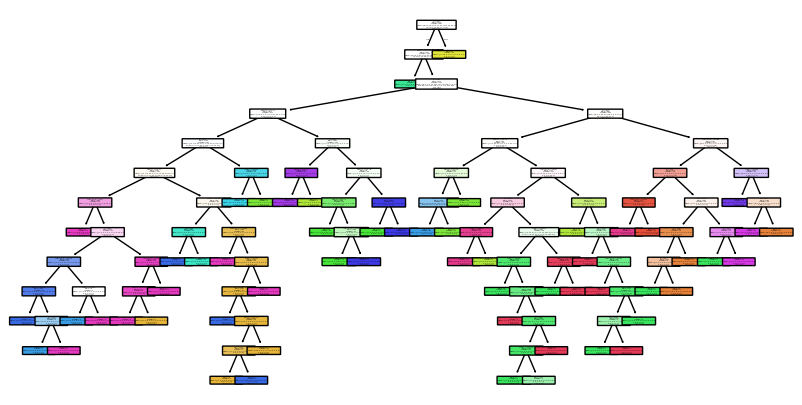

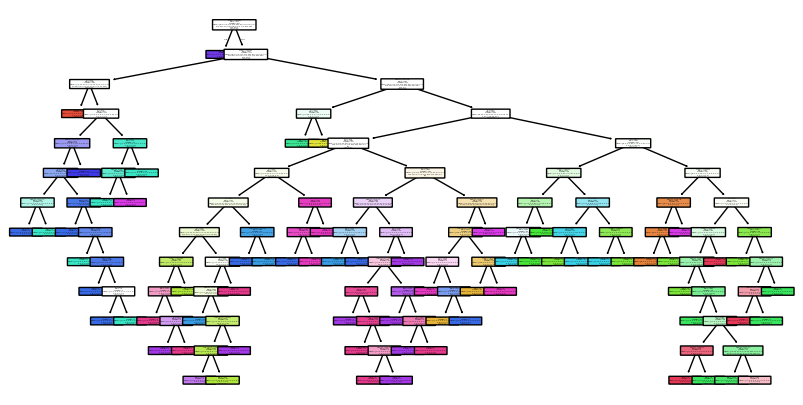

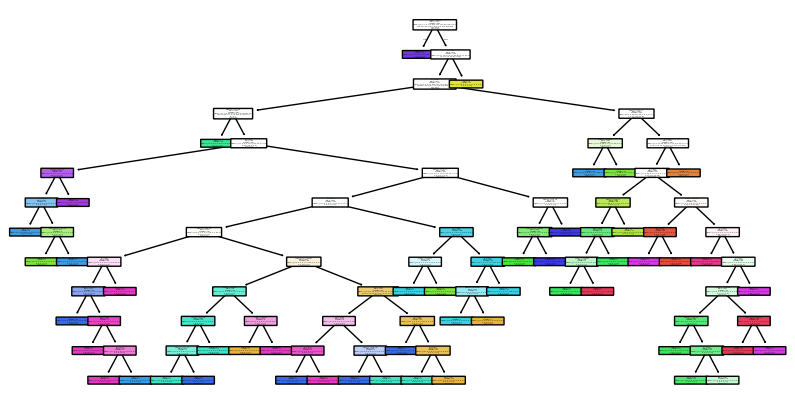

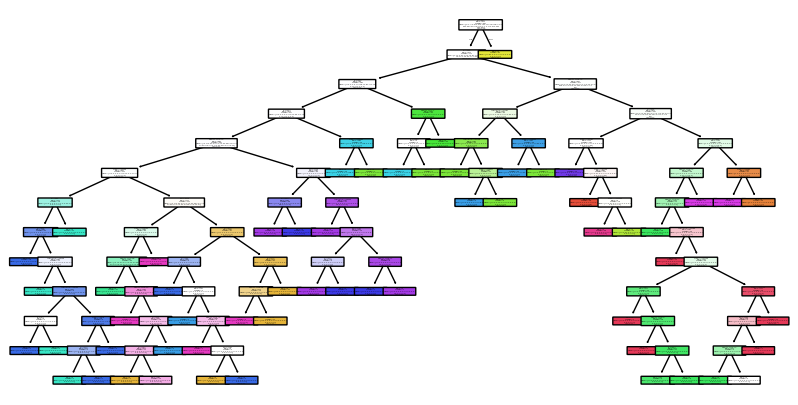

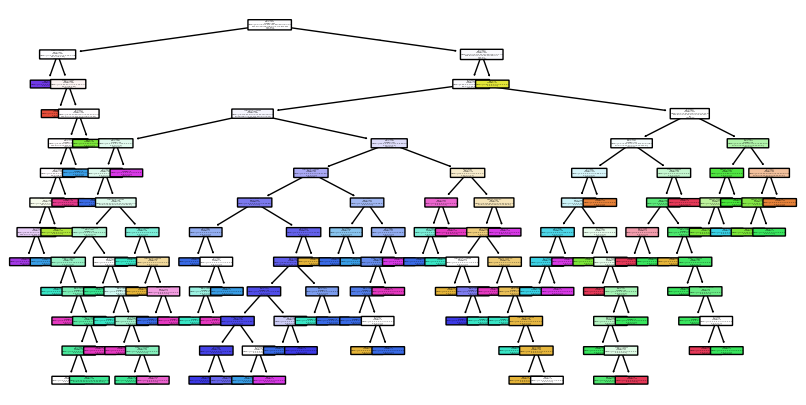

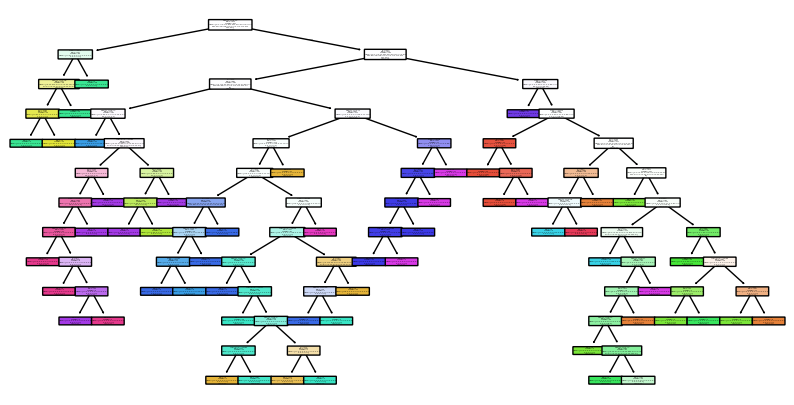

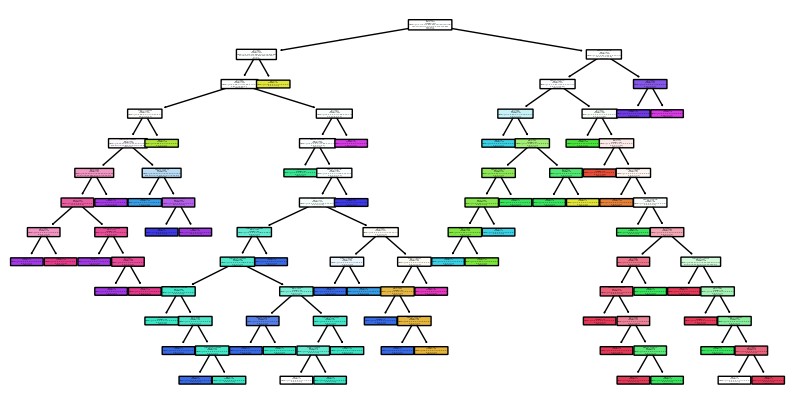

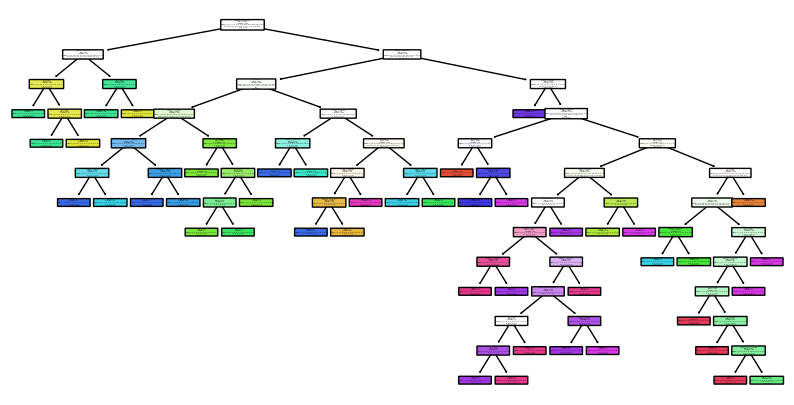

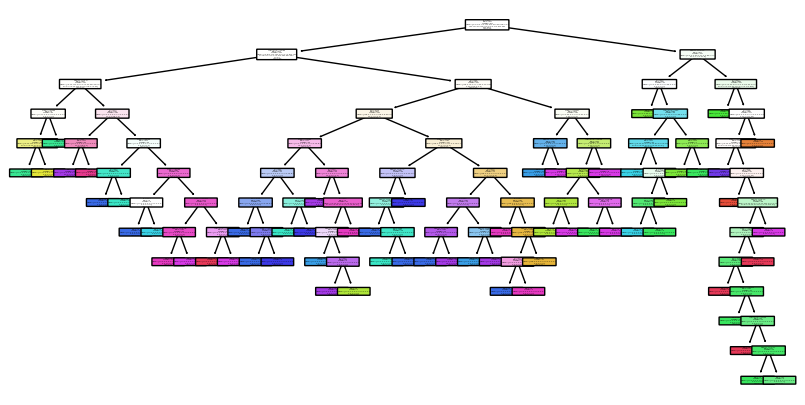

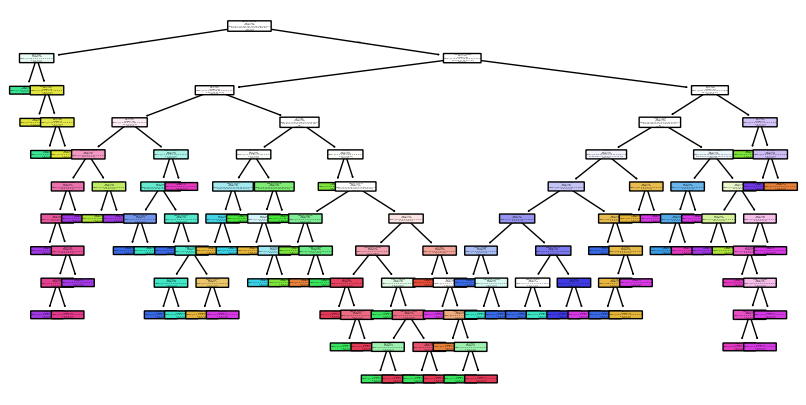

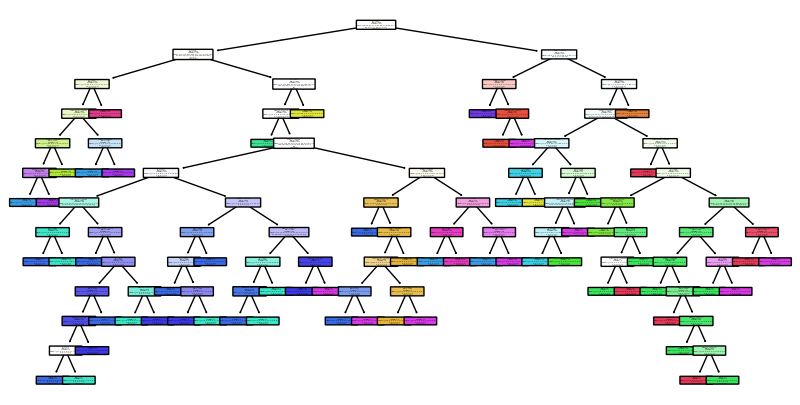

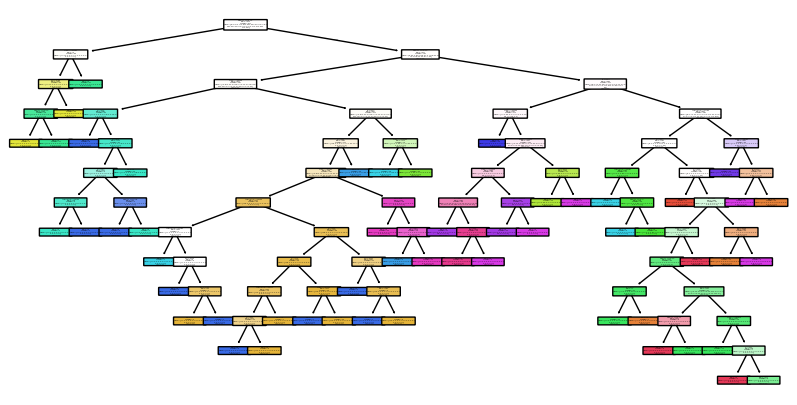

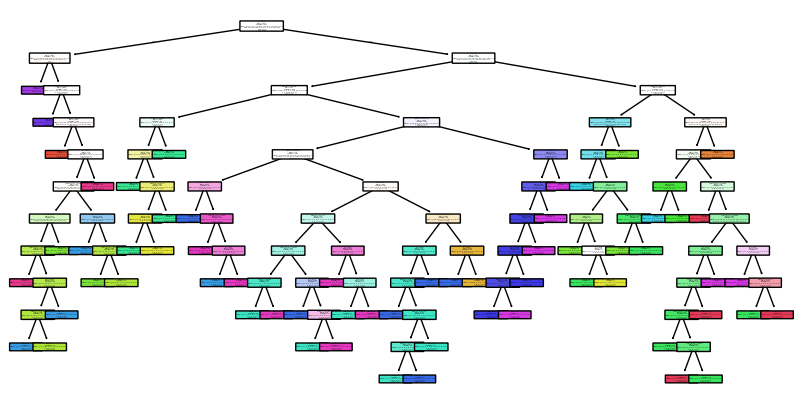

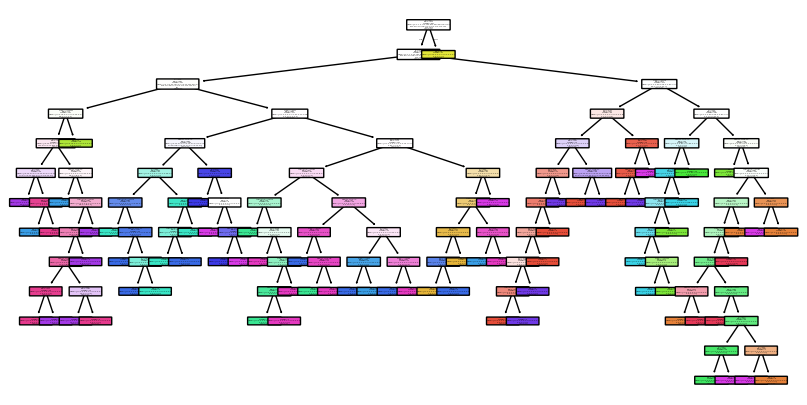

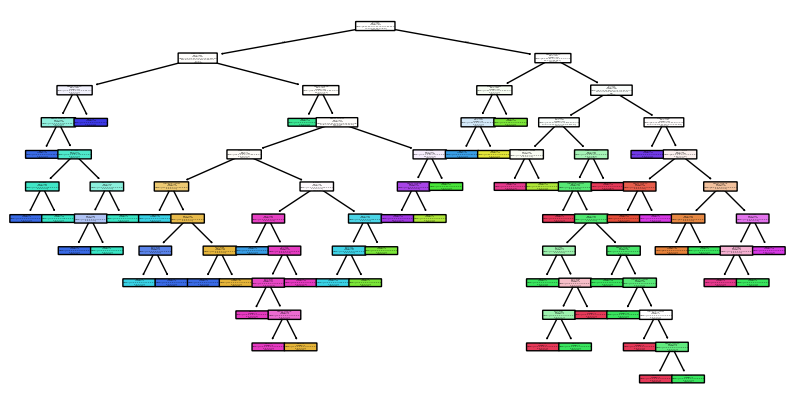

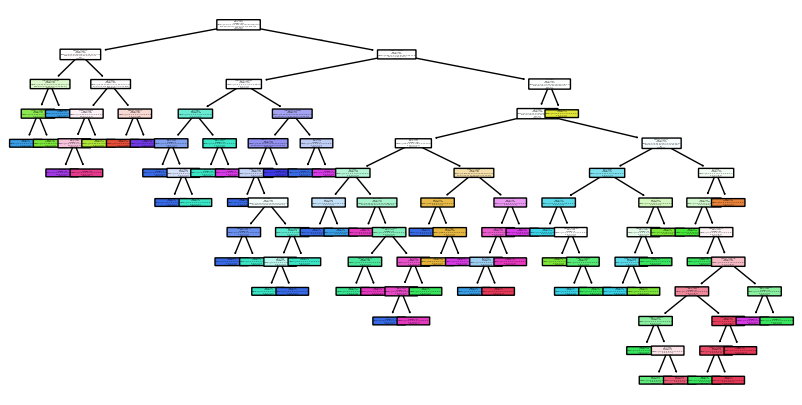

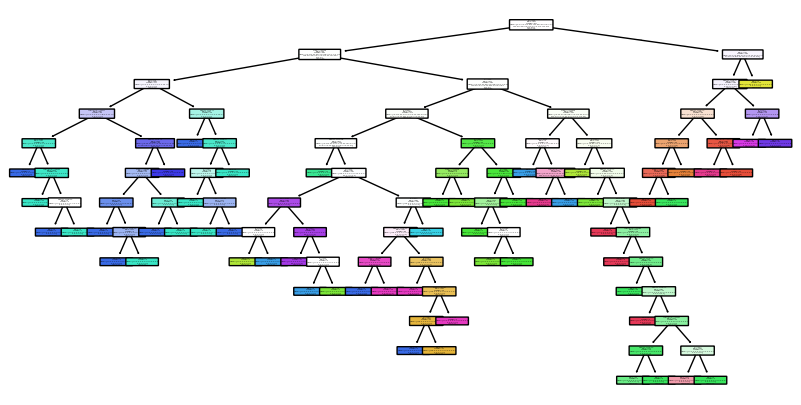

In [ ]:
for tree_in_forest in best_model.estimators_:
    plt.figure(figsize=(10, 5))
    tree.plot_tree(tree_in_forest, filled=True, feature_names=x.columns, class_names=y, rounded=True)
    plt.show()